<a href="https://colab.research.google.com/github/aminayusif/Cyber-Guard/blob/main/CyberGuard_Machine_Learning_for_Cyberattack_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In today’s digital era, cyber threats are evolving rapidly, making traditional defense mechanisms increasingly inadequate. Organizations are now seeking intelligent, data-driven solutions to identify, classify, and mitigate cybersecurity threats in real time. This project, titled "CyberGuard: Machine Learning for Cyberattack Detection and Classification," applies machine learning (ML) techniques to network and system-level data to automatically detect and classify different types of cyberattacks.

The dataset used contains 40,000 labeled records of cybersecurity events, including features such as IP addresses, ports, protocols, payload data, anomaly scores, and metadata from firewall and intrusion detection systems. The primary objective is to develop a classification model that can predict the attack type based on these features, and optionally assess its severity level.

The project follows a complete ML pipeline, beginning with exploratory data analysis (EDA) to uncover patterns in attack behavior, protocol usage, and severity trends. In the data preprocessing phase, we handle missing values (particularly in logs such as IDS alerts and proxy information), encode categorical variables, and reduce high-cardinality fields that may lead to overfitting.

Feature engineering includes transforming timestamps into useful temporal features, encoding traffic types and protocols, and identifying significant indicators from anomaly scores. We then experiment with multiple supervised classification algorithms such as Random Forest, Logistic Regression, and Gradient Boosting, using grid search and cross-validation for optimization.

Model evaluation is conducted using metrics like accuracy, precision, recall, F1 score, and ROC-AUC. Confusion matrices and error analysis help interpret the model's performance and pinpoint common misclassifications, aiding in iterative improvements.

The final output is a trained ML model capable of identifying and classifying cyberattacks, which could be integrated into security systems for automated detection. The project not only demonstrates the practical use of machine learning in cybersecurity but also highlights the importance of combining domain knowledge with data science to build intelligent defense mechanisms.

This solution can help cybersecurity teams improve response times, reduce false positives, and better allocate resources in the face of increasingly sophisticated threats.

## Objectives

- Perform exploratory data analysis (EDA) on cybersecurity logs
- Clean and preprocess high-volume network data
- Engineer relevant features from raw logs
- Train and evaluate machine learning models to detect and classify attack types
- Analyze model performance using metrics and error analysis


## Exploratory Data Analysis and Data Preprocessing

### Import common libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Overview

 The dataset for this case study is provided in the file cybersecurity_attacks.csv
 and contains approximately 40,000 records. The key attributes include IP addresses, protocol, ports, payload data, anomaly scores, attack type

**Network activity** : IP, Port, Protocol, Packet Length

**System-level data** : User Info, Device Info, Geo-location

**Security-specific logs** : Anomaly Scores, Firewall Logs, Attack Signature

**Labels** : Attack Type, Severity Level

#### Import Dataset

In [2]:
import pandas as pd

data = pd.read_csv('cybersecurity_attacks.csv')

print("Dataset Overview:")
display(data.head())

print("\nColumn Information:")
display(data.info())

Dataset Overview:


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall



Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature 

None

In [3]:
data.shape

(40000, 25)

Dataset consists of 40,000 rows and 25 columns

Let's check for null values

In [4]:
data.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


These columns have null values:
1. Malware Indicators
2. Alerts/Warnings
3. Proxy Information
4. Firewall Logs
5. IDS/IPS Alerts


In [5]:
# List of columns with null values to impute
columns_to_impute = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Replace null values with "Unknown" or "No Data"
data[columns_to_impute] = data[columns_to_impute].fillna('Unknown')

print("\nNull values after imputation:")
display(data.isnull().sum())


Null values after imputation:


,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


We now have no missing values in any column

We want to drop columns which have no substantial information:

1. Source IP Address
2. Destination IP Address
3. Payload Data
4. User Information
5. Device Information
6. Proxy Information

In [6]:
# List of columns to drop
columns_to_drop = ['Source IP Address', 'Destination IP Address', 'Payload Data', 'User Information', 'Device Information','Proxy Information']

# Drop the specified columns
data = data.drop(columns=columns_to_drop) # These columns to be dropped



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           40000 non-null  object 
 1   Source Port         40000 non-null  int64  
 2   Destination Port    40000 non-null  int64  
 3   Protocol            40000 non-null  object 
 4   Packet Length       40000 non-null  int64  
 5   Packet Type         40000 non-null  object 
 6   Traffic Type        40000 non-null  object 
 7   Malware Indicators  40000 non-null  object 
 8   Anomaly Scores      40000 non-null  float64
 9   Alerts/Warnings     40000 non-null  object 
 10  Attack Type         40000 non-null  object 
 11  Attack Signature    40000 non-null  object 
 12  Action Taken        40000 non-null  object 
 13  Severity Level      40000 non-null  object 
 14  Network Segment     40000 non-null  object 
 15  Geo-location Data   40000 non-null  object 
 16  Fire

In [8]:
data.shape

(40000, 19)

### Class Distributions, Class Balance and Anomaly Trends

#### Class Distributions

##### 1. Attack Types

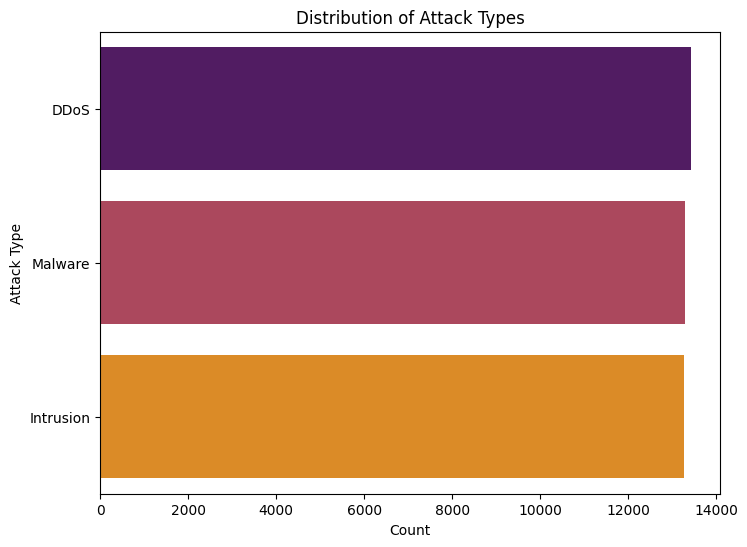


Attack Type distribution percentages:


,proportion
Attack Type,
DDoS,33.5700
Malware,33.2675
Intrusion,33.1625


In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Attack Type', order=data['Attack Type'].value_counts().index, palette='inferno')
plt.title('Distribution of Attack Types')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

print("\nAttack Type distribution percentages:")
display(data['Attack Type'].value_counts(normalize=True) * 100)

##### 2. Protocol Usage

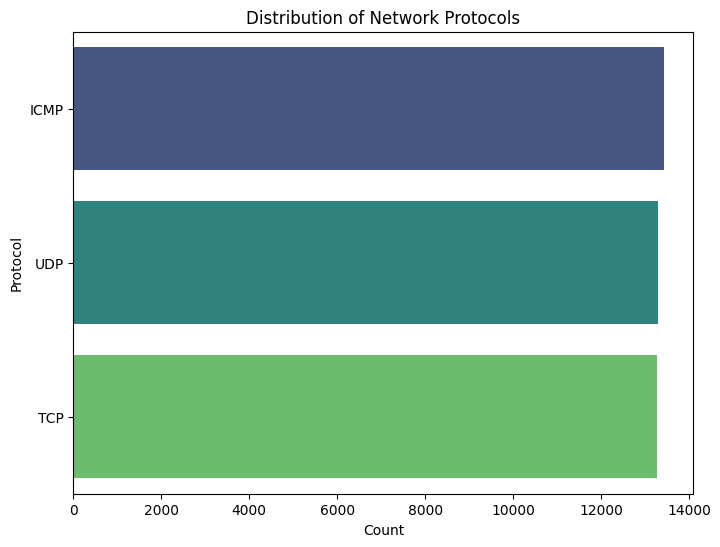


Protocol distribution percentages:


,proportion
Protocol,
ICMP,33.5725
UDP,33.2475
TCP,33.1800


In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Protocol', order=data['Protocol'].value_counts().index, palette='viridis')
plt.title('Distribution of Network Protocols')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.show()

print("\nProtocol distribution percentages:")
display(data['Protocol'].value_counts(normalize=True) * 100)

 ##### 3. Severity Levels

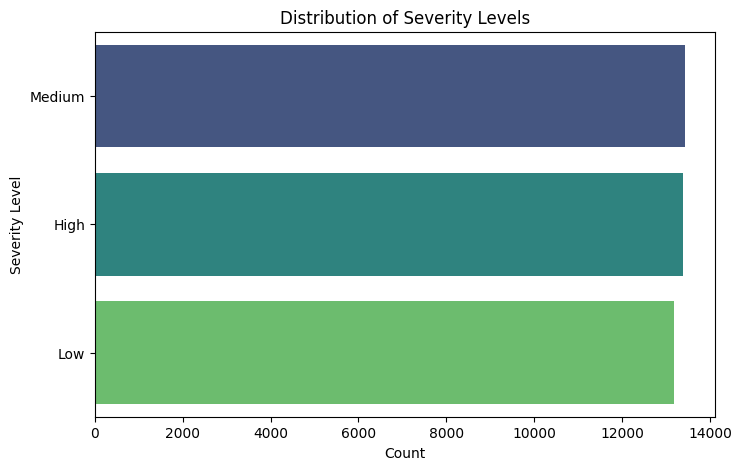

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Severity Level', order=data['Severity Level'].value_counts().index, palette='viridis')
plt.title('Distribution of Severity Levels')
plt.xlabel('Count')
plt.ylabel('Severity Level')
plt.show()

##### 4. Packet Types

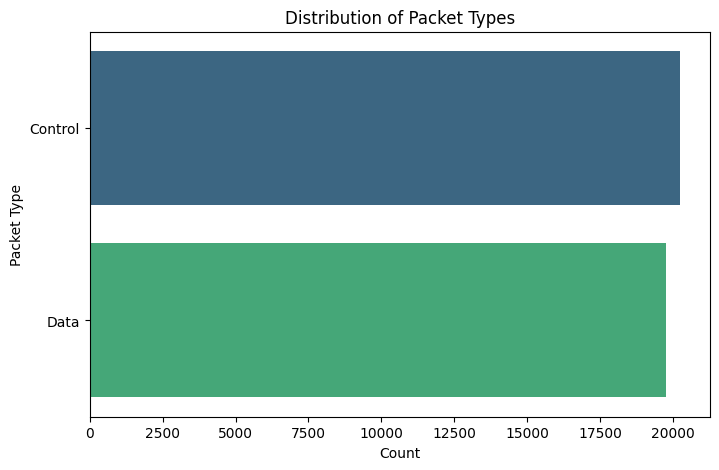

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Packet Type', order=data['Packet Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Packet Types')
plt.xlabel('Count')
plt.ylabel('Packet Type')
plt.show()

##### 5. Traffic Types

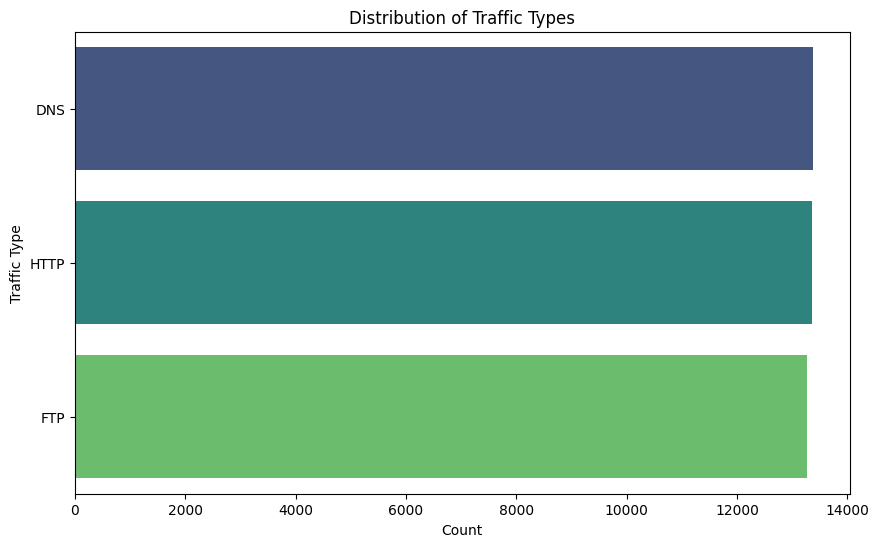

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Traffic Type', order=data['Traffic Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Traffic Types')
plt.xlabel('Count')
plt.ylabel('Traffic Type')
plt.show()

##### 6. Log Sources

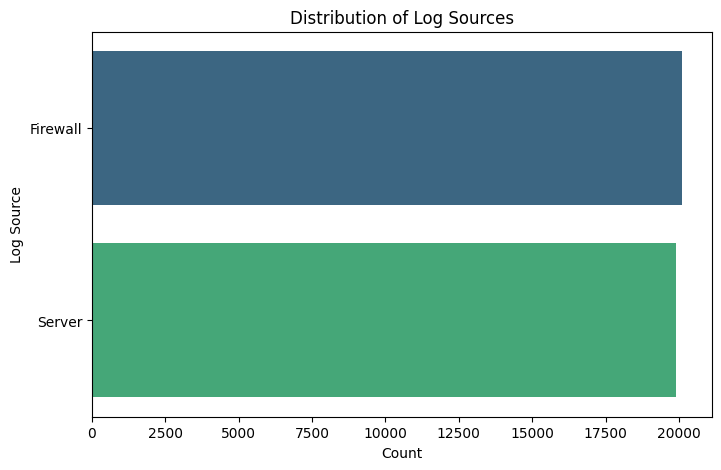

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Log Source', order=data['Log Source'].value_counts().index, palette='viridis')
plt.title('Distribution of Log Sources')
plt.xlabel('Count')
plt.ylabel('Log Source')
plt.show()

##### 7. Packet Lengths

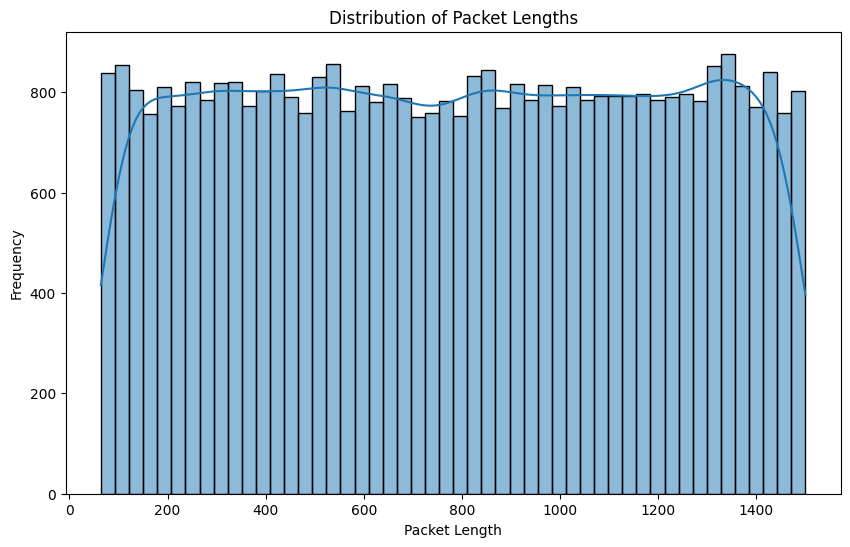

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Packet Length'], bins=50, kde=True)
plt.title('Distribution of Packet Lengths')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()

 ### Correlation Matrix of Numerical Features

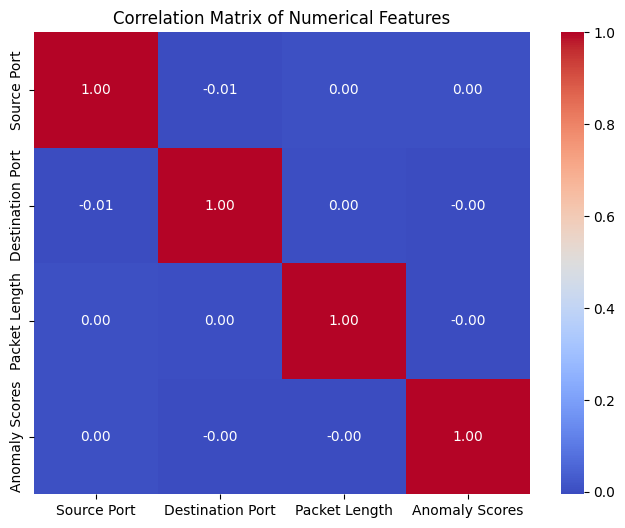

In [16]:
numerical_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can infer from this matrix is that there is very little to no linear correlation between the numerical features **'Source Port', 'Destination Port', 'Packet Length', and 'Anomaly Scores'** in this dataset. This means that changes in one of these numerical features are not linearly associated with changes in the others.

This is a useful finding for model building, as it suggests that multicollinearity is not a significant issue among these specific numerical features.

### Summary of EDA Findings

Based on the analysis:

**Class Distributions and Class Balance:**
[Summarize findings from the Attack Type distribution plot and value counts here]

**Protocol Usage:**
[Summarize findings from the Protocol distribution plot and value counts here]

**Anomaly Score Trends:**
[Summarize findings from the Anomaly Score statistics and histogram here]

### Feature Engineering

#### Timestamp Based Features

Convert timestamp to datetime

In [17]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

In [18]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           40000 non-null  datetime64[ns]
 1   Source Port         40000 non-null  int64         
 2   Destination Port    40000 non-null  int64         
 3   Protocol            40000 non-null  object        
 4   Packet Length       40000 non-null  int64         
 5   Packet Type         40000 non-null  object        
 6   Traffic Type        40000 non-null  object        
 7   Malware Indicators  40000 non-null  object        
 8   Anomaly Scores      40000 non-null  float64       
 9   Alerts/Warnings     40000 non-null  object        
 10  Attack Type         40000 non-null  object        
 11  Attack Signature    40000 non-null  object        
 12  Action Taken        40000 non-null  object        
 13  Severity Level      40000 non-null  object    

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,Malware,Known Pattern B,Logged,Low,Segment A,"Jamshedpur, Sikkim",Log Data,Unknown,Server
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,Malware,Known Pattern A,Blocked,Low,Segment B,"Bilaspur, Nagaland",Log Data,Unknown,Firewall
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B,"Jaunpur, Rajasthan",Unknown,Alert Data,Firewall
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C,"Anantapur, Tripura",Unknown,Alert Data,Firewall


Now separate timestamp into hour, day of week, isweekend and month

In [19]:
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6]).astype(int)
data['Month'] = data['Timestamp'].dt.month

In [20]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           40000 non-null  datetime64[ns]
 1   Source Port         40000 non-null  int64         
 2   Destination Port    40000 non-null  int64         
 3   Protocol            40000 non-null  object        
 4   Packet Length       40000 non-null  int64         
 5   Packet Type         40000 non-null  object        
 6   Traffic Type        40000 non-null  object        
 7   Malware Indicators  40000 non-null  object        
 8   Anomaly Scores      40000 non-null  float64       
 9   Alerts/Warnings     40000 non-null  object        
 10  Attack Type         40000 non-null  object        
 11  Attack Signature    40000 non-null  object        
 12  Action Taken        40000 non-null  object        
 13  Severity Level      40000 non-null  object    

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,Severity Level,Network Segment,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,...,Low,Segment A,"Jamshedpur, Sikkim",Log Data,Unknown,Server,6,1,0,5
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,...,Low,Segment B,"Bilaspur, Nagaland",Log Data,Unknown,Firewall,7,2,0,8
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,Low,Segment C,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall,8,6,1,11
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,...,Medium,Segment B,"Jaunpur, Rajasthan",Unknown,Alert Data,Firewall,10,6,1,7
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,...,Low,Segment C,"Anantapur, Tripura",Unknown,Alert Data,Firewall,13,6,1,7


#### Network features

a. Port Category

> Classify ports as well-known (0–1023), registered (1024–49151), or dynamic



In [21]:
def categorize_port(port):
        if port <= 1023:
            return 'Well-Known'
        elif port <= 49151:
            return 'Registered'
        else:
            return 'Dynamic'

data['Source Port Category'] = data['Source Port'].apply(categorize_port)
data['Destination Port Category'] = data['Destination Port'].apply(categorize_port)

In [22]:
data.head()

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month,Source Port Category,Destination Port Category
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,...,"Jamshedpur, Sikkim",Log Data,Unknown,Server,6,1,0,5,Registered,Registered
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,...,"Bilaspur, Nagaland",Log Data,Unknown,Firewall,7,2,0,8,Registered,Registered
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall,8,6,1,11,Registered,Dynamic
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,...,"Jaunpur, Rajasthan",Unknown,Alert Data,Firewall,10,6,1,7,Registered,Registered
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,...,"Anantapur, Tripura",Unknown,Alert Data,Firewall,13,6,1,7,Registered,Registered


b. Packet Size Bin



> Categorize Packet Length as Small/Medium/Large using binning



In [23]:
data['Packet Size Category'] = pd.cut(
       data['Packet Length'],
        bins=[-1, 500, 1000, np.inf],
        labels=['Small', 'Medium', 'Large']
    )


#### Security-Related Features

Malware indicator flag



> Convert 'IoC Detected' into binary 1/0 or category (None, IoC Detected



In [24]:
data['MalwareFlag'] = data['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else 0)
data.head()

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month,Source Port Category,Destination Port Category,Packet Size Category,MalwareFlag
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,Unknown,...,Unknown,Server,6,1,0,5,Registered,Registered,Medium,1
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,Unknown,...,Unknown,Firewall,7,2,0,8,Registered,Registered,Large,1
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,Alert Data,Firewall,8,6,1,11,Registered,Dynamic,Small,1
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,Unknown,15.79,Alert Triggered,...,Alert Data,Firewall,10,6,1,7,Registered,Registered,Small,0
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,Unknown,0.52,Alert Triggered,...,Alert Data,Firewall,13,6,1,7,Registered,Registered,Large,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  40000 non-null  datetime64[ns]
 1   Source Port                40000 non-null  int64         
 2   Destination Port           40000 non-null  int64         
 3   Protocol                   40000 non-null  object        
 4   Packet Length              40000 non-null  int64         
 5   Packet Type                40000 non-null  object        
 6   Traffic Type               40000 non-null  object        
 7   Malware Indicators         40000 non-null  object        
 8   Anomaly Scores             40000 non-null  float64       
 9   Alerts/Warnings            40000 non-null  object        
 10  Attack Type                40000 non-null  object        
 11  Attack Signature           40000 non-null  object        
 12  Acti

### Model Selection and Training for Supervised Learning

In the Model Selection & Training phase, we will perform the following:

1. Perform One-Hot Encoding for categorical features

2. Scale numerical features if needed

3. Train a classifier (e.g., Random Forest)

4. Evaluate using Precision, Recall, and F1 Score from the classification_report




🔍 Model: Logistic Regression
              precision    recall  f1-score   support

        DDoS       0.34      0.37      0.35      2686
   Intrusion       0.33      0.29      0.31      2653
     Malware       0.34      0.36      0.35      2661

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



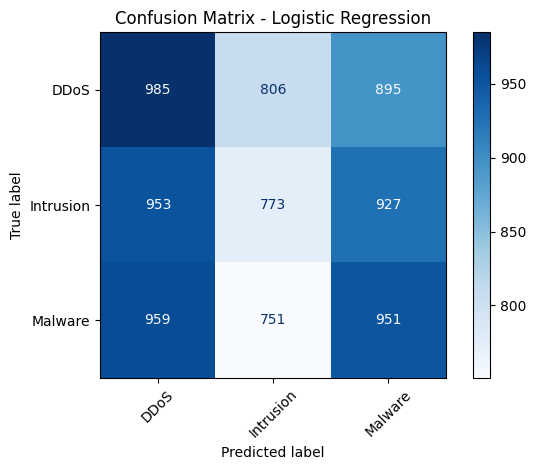

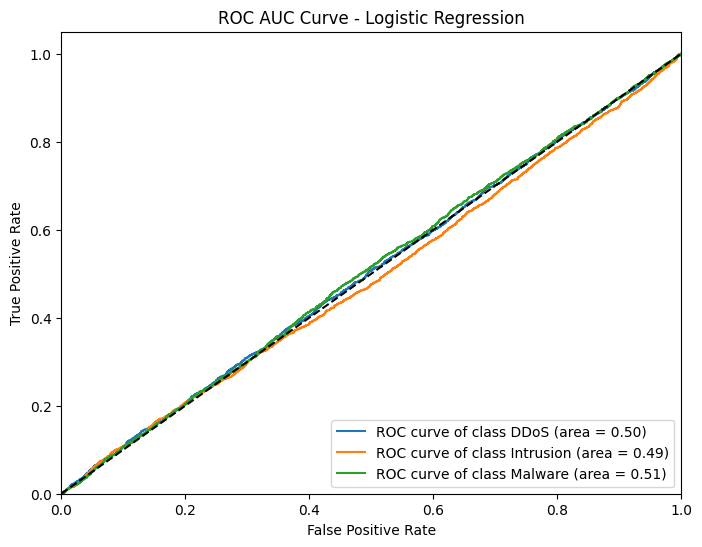


🔍 Model: Random Forest
              precision    recall  f1-score   support

        DDoS       0.33      0.35      0.34      2686
   Intrusion       0.32      0.31      0.32      2653
     Malware       0.33      0.32      0.33      2661

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



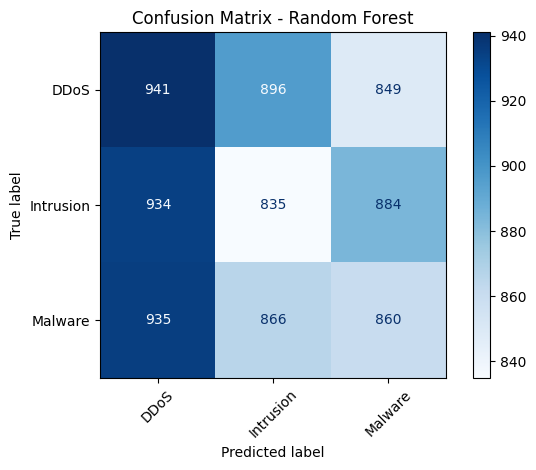

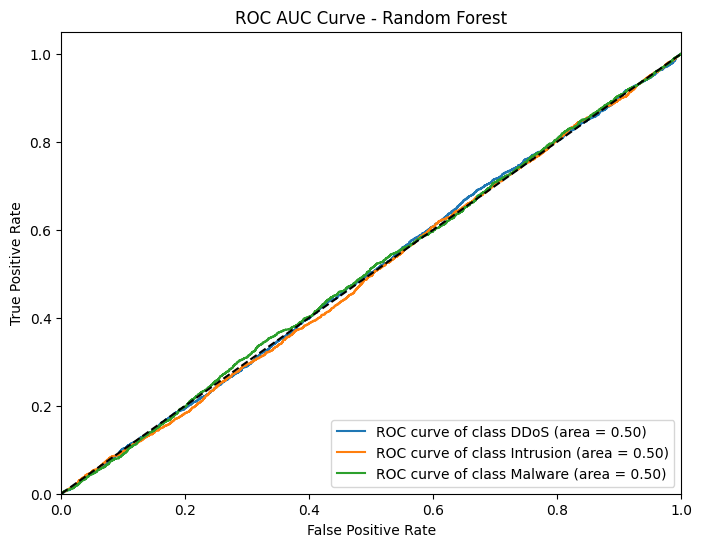


🔍 Model: Gradient Boosting
              precision    recall  f1-score   support

        DDoS       0.34      0.72      0.46      2686
   Intrusion       0.36      0.10      0.16      2653
     Malware       0.32      0.18      0.23      2661

    accuracy                           0.33      8000
   macro avg       0.34      0.33      0.28      8000
weighted avg       0.34      0.33      0.28      8000



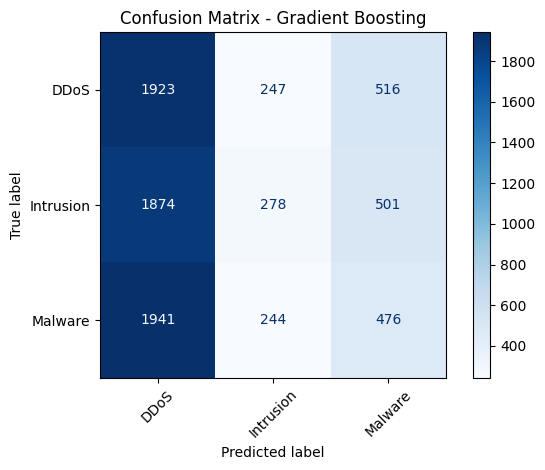

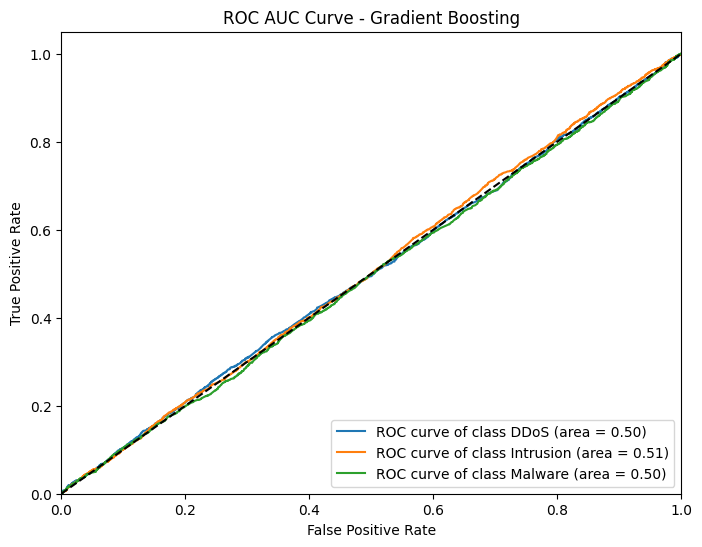

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.338625,0.338251,0.338625,0.337785,0.500026
1,Random Forest,0.329500,0.329379,0.329500,0.329351,0.500247
2,Gradient Boosting,0.334625,0.338454,0.334625,0.283399,0.501134


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Define features and target
# Drop the original Timestamp column after feature engineering
X = data.drop(columns=['Attack Type', 'Timestamp','Geo-location Data',
                       'Attack Signature','Action Taken','Malware Indicators',
                       'IDS/IPS Alerts','Firewall Logs'])
y = data['Attack Type']

# Binarize the output for ROC AUC calculation
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Models and parameter grids
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20]
    }),
    "Gradient Boosting": (HistGradientBoostingClassifier(random_state=42), {
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    })
}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_test_bin = label_binarize(y_test, classes=np.unique(y))


results = []

# Train and evaluate each model
for name, (model, params) in models.items():
    print(f"\n🔍 Model: {name}")

    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Cross-validation strategy
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # GridSearchCV
    grid_search = GridSearchCV(pipeline, params, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)

    # Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    results.append([name, accuracy, precision, recall, f1_score, roc_auc])

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

    # ROC AUC Curve
    fpr = dict()
    tpr = dict()
    roc_auc_dict = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc_dict[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(y)[i]} (area = {roc_auc_dict[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


# Tabulate results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])
display(results_df)

### Analysis of Evaluation

From the `results_df` table, we can see the following:

| Model | Accuracy | Precision | Recall | F1-Score | ROC AUC |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Logistic Regression | 0.3386 | 0.3383 | 0.3386 | 0.3378 | 0.5000 |
| Random Forest | 0.3295 | 0.3294 | 0.3295 | 0.3294 | 0.5002 |
| Gradient Boosting | 0.3346 | 0.3385 | 0.3346 | 0.2834 | 0.5011 |

**Key Observations:**

1.  **Low Performance Across All Models:** All three models have very low accuracy, precision, recall, and F1 scores (around 33-34%). This is only slightly better than a random guess for a three-class problem (which would be 33.3%). The ROC AUC scores are also close to 0.5, which indicates that the models have very little discriminative power.

2.  **Gradient Boosting's Low F1-Score:** The Gradient Boosting model has a particularly low F1-score (0.2834) compared to its accuracy. This suggests that there might be a significant imbalance in precision and recall for some classes, which is confirmed by its confusion matrix.

3.  **No Clear "Best" Model:** None of the models stand out as significantly better than the others. Their performance is very similar, suggesting that the issue might be with the data or features rather than the choice of algorithm.

### Recommendations for Improvement

Given the poor performance, here are some recommendations to improve the models:

1.  **Feature Engineering:**
    *   **Interaction Features:** Create interaction features between existing variables. For example, the combination of a specific `Protocol` and `Packet Type` might be more indicative of an attack than either feature alone.
    *   **Advanced Text Features:** Instead of just dropping `Payload Data`, we could use NLP techniques to extract features from it, such as TF-IDF or word embeddings. This might reveal patterns in the payload that are associated with specific attacks.
    *   **Geo-location Features:** While we dropped `Geo-location Data`, we could extract the country or region from this column and see if that has any predictive power.

2.  **Data Quality and Preprocessing:**
    *   **Handling "Unknown" Values:** We replaced `NaN` values with "Unknown". While this is a reasonable first step, it might be beneficial to explore more sophisticated imputation techniques, especially if the missingness itself is informative.
    *   **Outlier Detection:** The `Anomaly Scores` feature might contain outliers that are affecting the models. We could try to remove or cap these outliers to see if it improves performance.

3.  **Model and Training Strategy:**
    *   **Address Class Imbalance (if any):** Although the initial EDA showed a balanced dataset for `Attack Type`, it's worth double-checking if the train/test split has maintained this balance. If not, techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be used to balance the training data.
    *   **Try Different Algorithms:** We could experiment with other powerful classification algorithms like Support Vector Machines (SVM) or neural networks, which might be able to capture more complex patterns in the data.
    *   **More Extensive Hyperparameter Tuning:** We could expand the hyperparameter grids for `GridSearchCV` to explore a wider range of possibilities for each model.

4.  **In-depth Error Analysis:**
    *   **Analyze Misclassified Samples:** We can examine the specific instances that the models are misclassifying. This could reveal patterns or characteristics of the data that are causing confusion and lead to new feature ideas.

By implementing these recommendations, we can systematically address the potential issues and work towards building a more accurate and reliable cyberattack detection model.

## Unsupervised Learning

### Dimensionality Reduction for Visualization & Preprocessing

Visualize patterns and compress data before anomaly detection

Techniques:
PCA (Principal Component Analysis)
Reduces high-dimensional logs into fewer features.

t-SNE / UMAP
Non-linear reduction for visualizing hidden structure in network data.

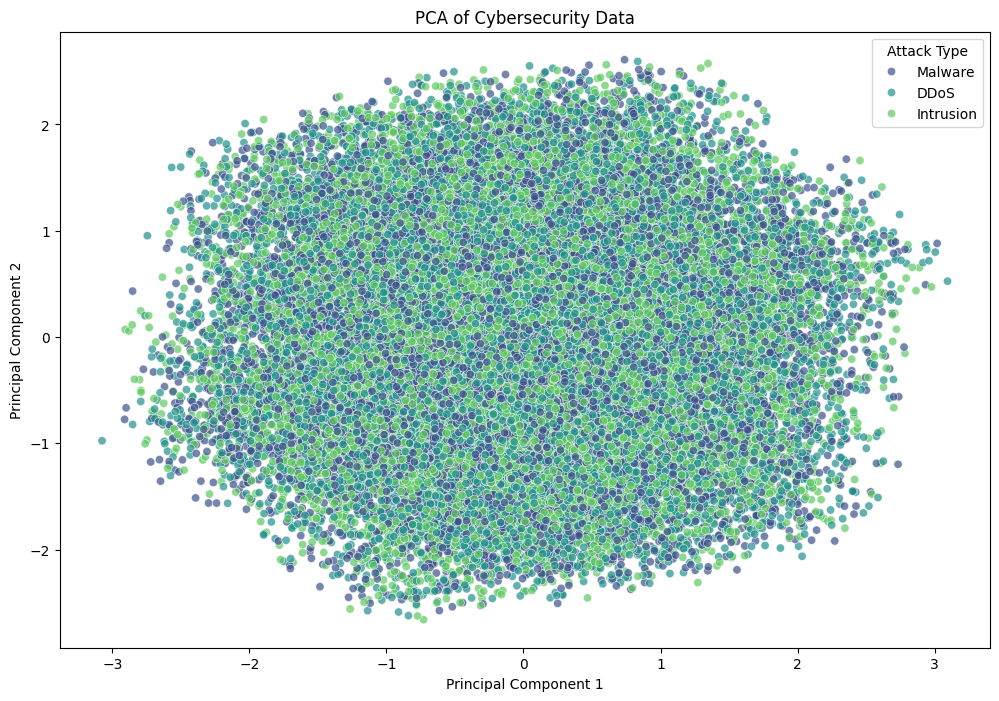

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



data = pd.read_csv('cybersecurity_attacks.csv')
# We will use the same preprocessor as before to prepare the data
# Define features and target
X = data.drop(columns=['Attack Type', 'Timestamp','Geo-location Data',
                       'Attack Signature','Action Taken','Malware Indicators',
                       'IDS/IPS Alerts','Firewall Logs'])
y = data['Attack Type']

# Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline with preprocessing and PCA
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))
])

# Fit and transform the data
X_pca = pca_pipeline.fit_transform(X)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Attack Type'] = y.values

# Plot the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Attack Type', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Cybersecurity Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Type')
plt.show()